In [24]:
from optimizingcd import main_cd as simulation
import numpy as np
import matplotlib.pyplot as plt
import pickle
plt.style.use("seaborn-v0_8-paper")

font = 16
plt.rcParams.update({
    'text.usetex': False,
    'font.family': 'arial',
    'font.size': font,
    'axes.labelsize': font,  
    'xtick.labelsize': font,  
    'ytick.labelsize': font, 
    'legend.fontsize': font,
    'legend.title_fontsize': font,
    'axes.titlesize': font
})

In [ ]:
# Run simulation (total_time = 1000 will take 80min)
n = 100
vals = { # define fixed parameters for given simulation function 
            'protocol':'ndsrs', 
            'A': simulation.adjacency_random_tree(n),
            'p_gen': 0.9,  # generation rate
            'q_swap': np.random.random_sample(n),
            'p_swap': 1,  # success probability
            'p_cons': 0.9/4,  # consumption rate
            'cutoff': 28,
            'M': 10,
            'qbits_per_channel': 5,
            'N_samples' : 1000,
            'total_time': 1000,
            }
res = simulation.simulation_cd(**vals) 

In [61]:
# Load data from published repository LINK
with open('path/to/steady/sim_random_N=1000_T=1000_seed1.pkl', 'rb') as file:
    res = pickle.load(file)

Text(0.5, 0, '$T_{sim}$')

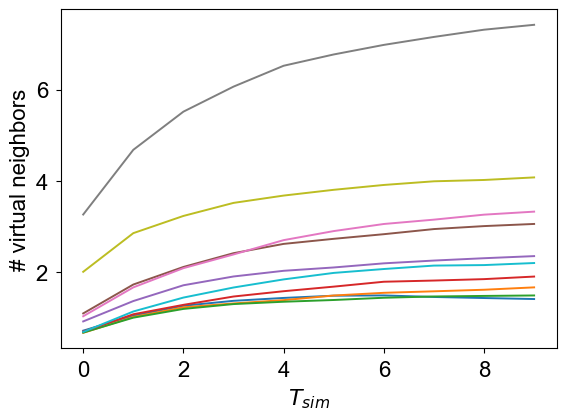

In [55]:
mean_per_node = np.array(res[1])

plt.plot(mean_per_node[:10].T[:10])
plt.ylabel('# virtual neighbors')
plt.xlabel(r'$T_{sim}$')

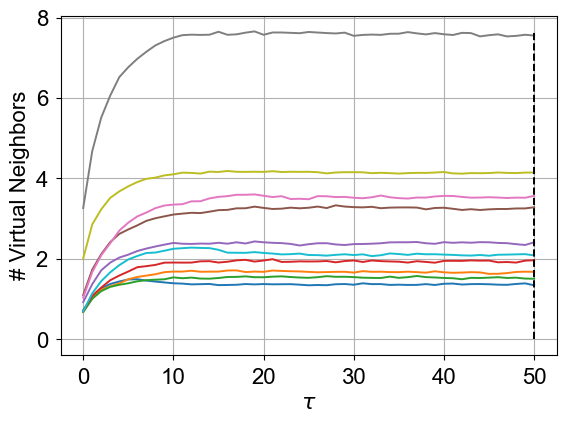

In [59]:
plt.plot(mean_per_node[:10].T[:51])
plt.ylabel('# Virtual Neighbors')
plt.xlabel(r'$\tau$')
plt.grid()
plt.vlines(x=50,ymin=0, ymax=np.max(mean_per_node[:10].T[:51]), linestyles='dashed', colors='black')
plt.savefig('steady-50.pdf', bbox_inches="tight")

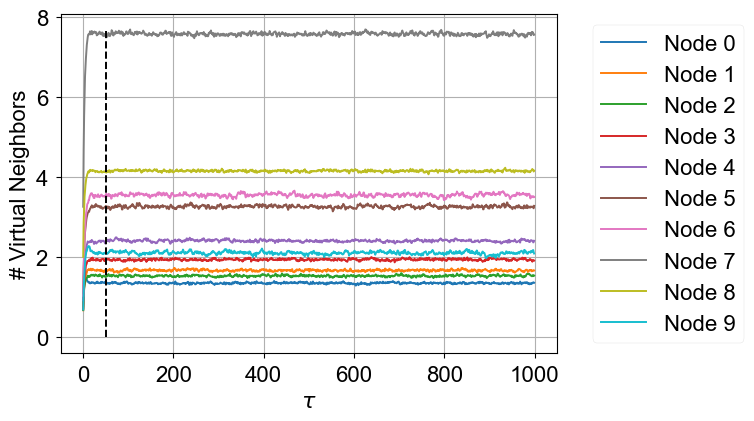

In [60]:
plt.plot(mean_per_node[:10].T[:1000], label=[f'Node {i}' for i in range(10)])
plt.ylabel('# Virtual Neighbors')
plt.xlabel(r'$\tau$')
plt.grid()
plt.vlines(x=51,ymin=0, ymax=np.max(mean_per_node[:10].T[:51]), linestyles='dashed', colors='black')
plt.legend( bbox_to_anchor=(1.05, 1))
plt.savefig('steady-1000.pdf', bbox_inches="tight")
